In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("D:\Symbiosis\Dataset\salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [2]:
#decide independent & dependant
#x->Level
#y->Salary

In [3]:
x=df[["Level"]]
y=df["Salary"]

Text(0, 0.5, 'Salary')

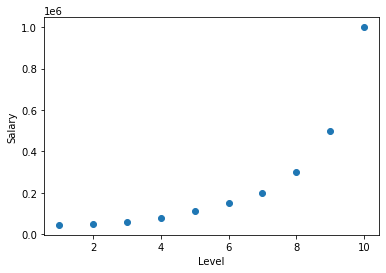

In [4]:
plt.scatter(x,y)
plt.xlabel("Level")
plt.ylabel("Salary")

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=(0.2))

In [6]:
#step 2
lin_model=LinearRegression()
lin_model.fit(x,y)

LinearRegression()

In [7]:
ypred=lin_model.predict(x)

In [8]:
pd.DataFrame({"Actual":y,"Predicted":ypred})

,Actual,Predicted
0,45000,-114454.545455
1,50000,-33575.757576
2,60000,47303.030303
3,80000,128181.818182
4,110000,209060.606061
5,150000,289939.393939
6,200000,370818.181818
7,300000,451696.969697
8,500000,532575.757576
9,1000000,613454.545455


In [9]:
lin_model.score(x,y)


0.6690412331929895

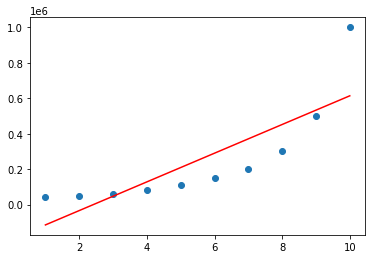

In [10]:
plt.scatter(x,y)
plt.plot(x,ypred,color='r')

In [11]:
#first step
x=df[["Level"]]
y=df["Salary"]

In [12]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans=PolynomialFeatures(degree=3)
#transform x to polynomial feature with degree is 3
x_poly=poly_trans.fit_transform(x)

In [14]:
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [15]:
poly_model=LinearRegression()
poly_model.fit(x_poly,y)

LinearRegression()

In [16]:
ypred=poly_model.predict(x_poly)

In [17]:
pd.DataFrame({"Actual":y,"Predicted":ypred})

,Actual,Predicted
0,45000,14902.097902
1,50000,78759.906760
2,60000,94960.372960
3,80000,88223.776224
4,110000,83270.396270
5,150000,104820.512821
6,200000,177594.405594
7,300000,326312.354312
8,500000,575694.638695
9,1000000,950461.538462


In [18]:
poly_model.score(x_poly,y)

0.9812097727913366

In [22]:
from sklearn.pipeline import Pipeline
myflow=Pipeline([("normalize scaler",MinMaxScaler()),("model",LinearRegression())])

In [23]:
model=myflow.fit(x,y)

In [24]:
model.score(x,y)

0.977447736744394

In [25]:
model.predict(x)

array([12.081447  ,  6.21184254, 24.35295412, 10.70889952, 27.83125684,
       21.39102807, 19.12655095, 12.51892736,  4.5344571 , 12.04009539,
        7.39464123,  8.57339881, 20.73466155, 21.36391657, 22.10544275,
       20.63296078, 28.47803959, 23.00711511, 16.19310017, 17.09267153,
       19.08130804, 15.65207869, 15.22513673, 17.29772926, 13.79716333,
        3.69074359,  7.65451022, 22.153041  ,  3.47154074,  8.84214865,
       12.21106749,  5.79061767, 11.83436334, 21.88763351, 32.2365176 ,
       38.47854021, 24.31924986, 28.28991138, 36.59462132, 32.0755068 ,
       34.5404892 , 32.99864629, 31.31482438, 31.50484691,  7.51954843,
       14.07865853, 10.67168878, 14.01931094, 13.44792039,  4.00677077,
       10.49295101,  6.64040691,  8.20998293,  6.58778193,  3.90576258,
       23.01515787, 20.78927153, 28.13429277, 31.15600534, 24.78018609,
       26.61481156, 29.3403688 , 30.2782407 , 25.85874177, 31.93543186,
       29.57660937, 21.27064328, 14.06328152,  6.83278536, 13.25